In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

SEED = 42

In [2]:
data_path = "C:/Users/code/assignment_2"
df = pd.read_csv(f"{data_path}/_data.csv", names=["x1", "x2", "x3", "y"], header=None)

In [3]:
X = np.array(df['x1']).reshape((-1, 1))
X = np.c_[np.ones(X.shape[0]), X] 
y = np.array(df['y'])

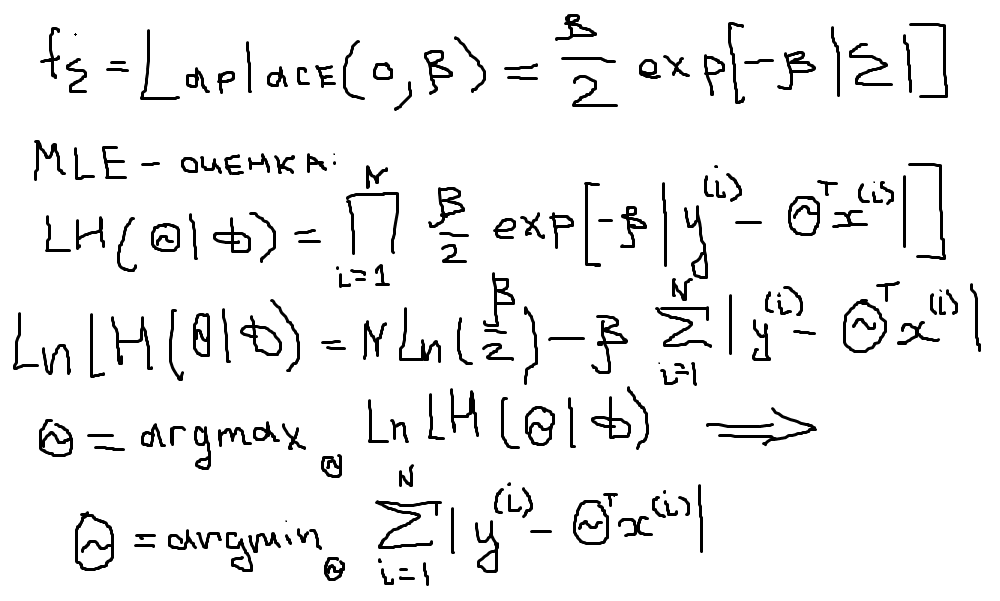

In [4]:
def gradient_descent(X, y):
    etas = np.zeros(X.shape[1])
    for _ in range(100):
        preds = X.dot(etas)
        errors = y - preds
        gradient = -np.dot(X.T, np.where(errors >= 0, 1, -1))
        etas = etas - 0.005 * gradient
    return etas

kf = KFold(n_splits=5, shuffle=True, random_state=SEED)

for train_index, test_index in kf.split(X):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    y_pred = X_test.dot(gradient_descent(X_train, y_train))
    
    mse = mean_absolute_error(y_test, y_pred)

print("cross val mae:", np.mean(mse))

cross val mae: 1.1715670241839795
